# Bibliotecas

In [1]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
from sklearn import linear_model


# Validação da Viabilidade do Projeto

In [32]:
# Valor Presente

vf = -10000 # valor futuro
i = 0.05 # taxa
pagamento = 0

valor_presente = npf.pv(i,10,pmt=0,fv=vf)
valor_presente

6139.132535407592

In [33]:
# Valor futuro

valor_futuro = npf.fv(i,10,pmt=pagamento,pv=-valor_presente)
valor_futuro

10000.0

In [34]:
# Valor Presente Liquido

ativo = 100000000 # Valor a ser investido no negócio
passivo_oneroso = ativo * 0.4 # Parte oriunda do banco, onerada com juros
patrimonio_liquido = ativo * 0.6 # Parte oriunda do investidor, capital próprio

ki = 0.12 # Juros do impréstimo(banco)
ke = 0.17 # Taxa minima de retorno para os investidores

# Custo medio ponderado de capital da empresa
wacc = ((passivo_oneroso/ativo)*ki)+((patrimonio_liquido/ativo)*ke) # Poderamento pelo peso dentro do financiamento do ativo
wacc

0.15000000000000002

In [49]:
# Fluxo de caixa
# Negativos indicam prejuízo e positivos lucro
cf1 = np.array([-100,-50,30,30,30,30,50,50,50,50])

# Valor Presente Liquido
vpl = npf.npv(wacc, cf1)
vpl

1.9708766350858458

In [50]:
# TIR - Taxa Interna de Retorno
# Vai igualar os fluxos futuros de caixa aos fluxos presentes(ao ano ou ao período avaliado)

tir = npf.irr(cf1)
tir

0.1531623429687181

In [51]:
print(f'O projeto renderá resultados pois, a WACC({wacc}) é menor que a TIR({tir})')
print('O que nos mostra que isso irá aregar valor para a empresa')

O projeto renderá resultados pois, a WACC(0.15000000000000002) é menor que a TIR(0.1531623429687181)
O que nos mostra que isso irá aregar valor para a empresa


In [38]:
# Payback
# Quanto tempo levará para o dinheiro retornar
# Investimento inicial / Economia = Numero de bolos a serem vendidos
# Numero de bolos a serem vendidos / Quantidade média vendida por mês

bm = 800 # Bolos mês
economia = 1600 # R$
bv = ativo / economia # Bolos a vender 

payback_mes = bv / bm

payback_ano = payback_mes / 12

print(f'A empresa levará {payback_mes:,.0f} meses ou {payback_ano:,.1f} anos para recuperar o investimento')

A empresa levará 78 meses ou 6.5 anos para recuperar o investimento


# Machine Learning para projeção de vendas

## Base de vendas por sabor

In [39]:
dados_vendas = pd.read_excel(r'C:\Users\L8358814\Desktop\Projeto_Crocomo\projecao_vendas.xlsx')


In [40]:
df_vendas = pd.DataFrame(dados_vendas)

## Previsão de vendas

In [41]:
reg = linear_model.LinearRegression()
reg.fit(df_vendas['Mês'].values.reshape(-1,1), df_vendas['Venda'])

LinearRegression()

In [42]:
reg.coef_

array([0.41083916])

In [43]:
reg.intercept_

326.78787878787875

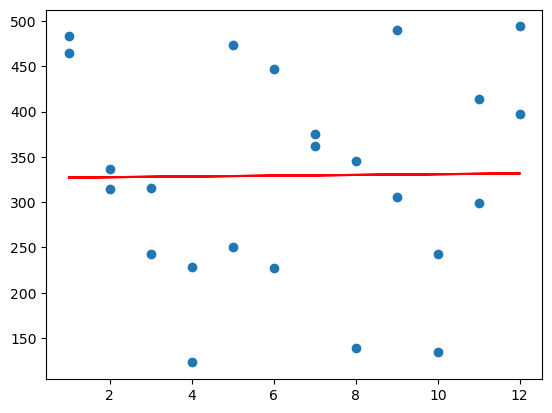

In [44]:
plt.scatter(df_vendas['Mês'], df_vendas['Venda'])
x = np.array(df_vendas['Mês'])
y = reg.intercept_ + x*reg.coef_
plt.plot(x,y,'r')
plt.show()

In [45]:
reg.predict([[15]])

array([332.9504662])

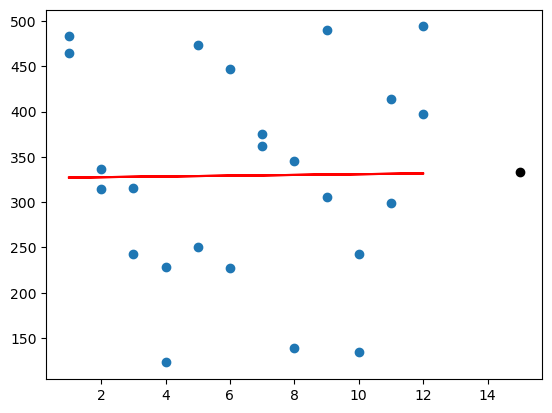

In [46]:
plt.scatter(df_vendas['Mês'], df_vendas['Venda'])
plt.scatter(15,reg.predict([[15]])[0],color='k')
x = np.array(df_vendas['Mês'])
y = reg.intercept_ + x*reg.coef_
plt.plot(x,y,'r')
plt.show()